Data Cleaning and Preparation 
Problem Statement: Analyzing Customer Churn in a Telecommunications Company 
Dataset: "Telecom_Customer_Churn.csv" 
Description: The dataset contains information about customers of a telecommunications 
company and whether they have churned (i.e., discontinued their services). The dataset 
includes various attributes of the customers, such as their demographics, usage patterns, and 
account information. The goal is to perform data cleaning and preparation to gain insights 
into the factors that contribute to customer churn. 
Tasks to Perform: 
1. Import the "Telecom_Customer_Churn.csv" dataset. 
2.  Explore the dataset to understand its structure and content. 
3.  Handle missing values in the dataset, deciding on an appropriate strategy. 
4. Remove any duplicate records from the dataset. 
5.  Check for inconsistent data, such as inconsistent formatting or spelling variations, 
and standardize it. 
6.  Convert columns to the correct data types as needed. 
7. Identify and handle outliers in the data. 
8. Perform feature engineering, creating new features that may be relevant to 
predicting customer churn. 
9.  Normalize or scale the data if necessary.  
10. Split the dataset into training and testing sets for further analysis. 
11. Export the cleaned dataset for future analysis or modeling. 

Dataset Overview:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies   

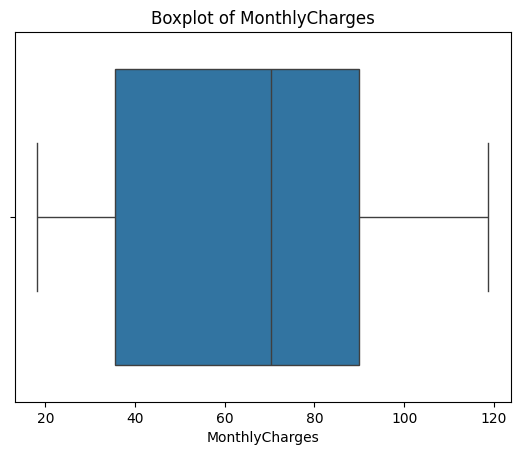


Normalized 'MonthlyCharges' and 'TotalCharges' columns:
   MonthlyCharges  TotalCharges
0        0.115423      0.001275
1        0.385075      0.215867
2        0.354229      0.010310
3        0.239303      0.210241
4        0.521891      0.015330

Visualizing pairwise relationships in the dataset:


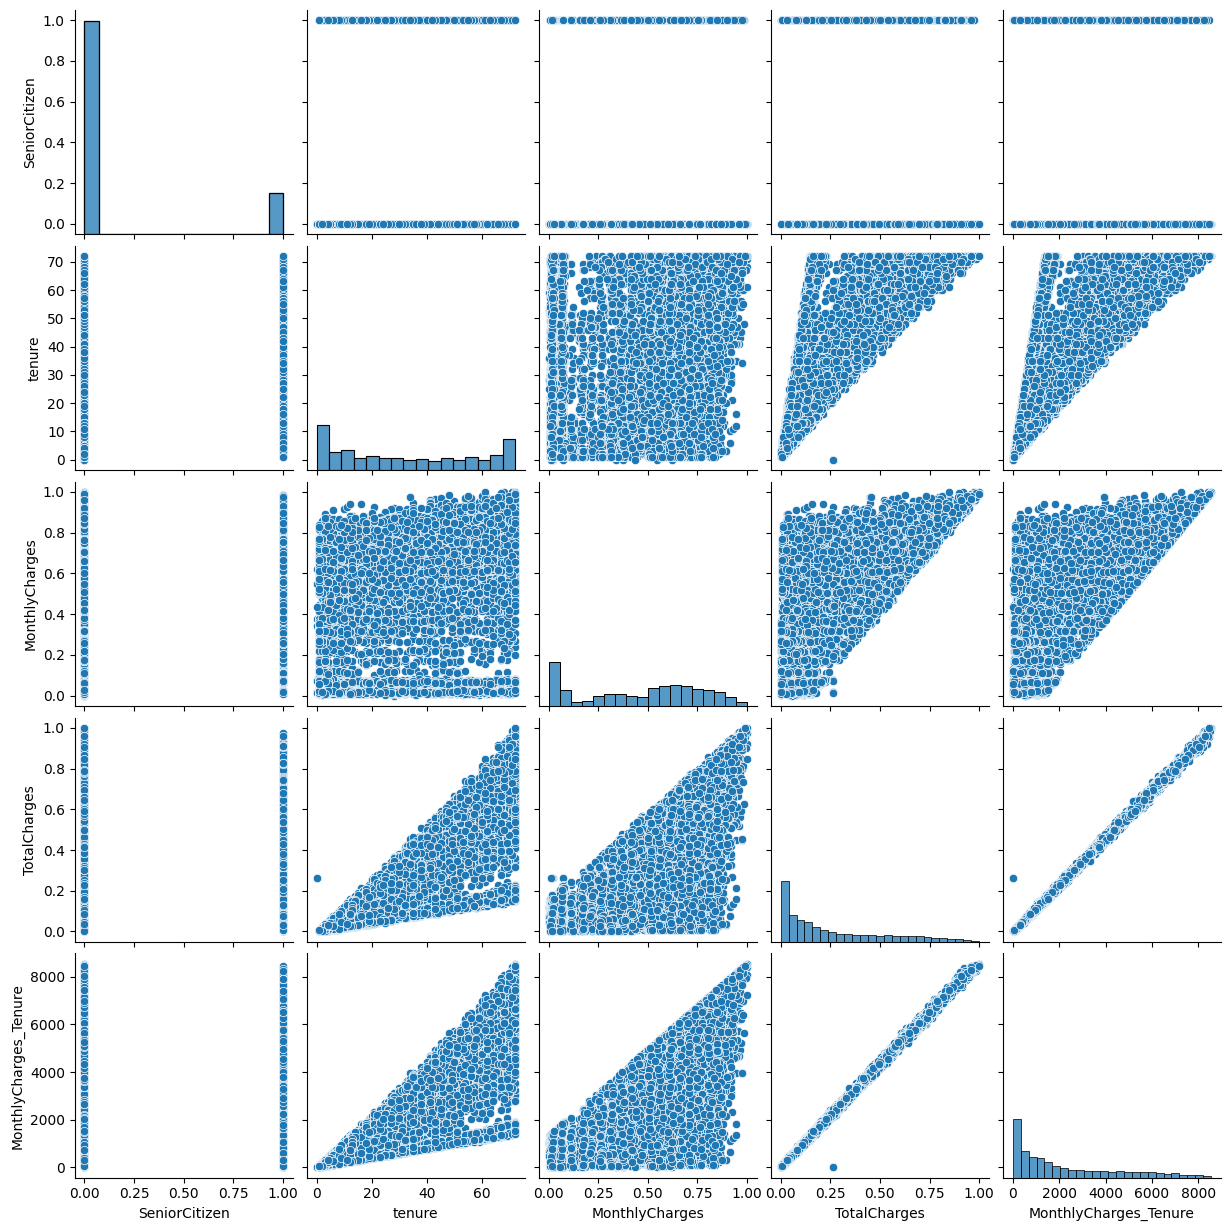


Training set size: (5634, 22)
Testing set size: (1409, 22)

Cleaned dataset has been saved to 'Telecom_Customer_Churn_Cleaned.csv'


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Import the dataset
df = pd.read_csv("Telecom_Customer_Churn.csv")

# 2. Explore the dataset to understand its structure and content
print("Dataset Overview:")
print(df.head())  # Display first 5 rows to understand the structure
print("\nDataset Info:")
print(df.info())  # Check the data types and non-null counts
print("\nDataset Shape:", df.shape)  # Check number of rows and columns
print("\nDataset Columns:", df.columns)  # Check column names

# 3. Handle missing values
print("\nMissing Values Count:")
print(df.isnull().sum())  # Check for missing values

# 4. Remove duplicate records
print("\nNumber of rows before removing duplicates:", len(df))
df_cleaned = df.drop_duplicates()
print("Number of rows after removing duplicates:", len(df_cleaned))

# 5. Check for inconsistent data
# Check for inconsistent formatting or spelling variations in categorical columns
print("\nUnique values in 'Contract' column:")
print(df['Contract'].unique())
print("\nUnique values in 'PaymentMethod' column:")
print(df['PaymentMethod'].unique())

# Standardize values in categorical columns (example)
df['PaymentMethod'] = df['PaymentMethod'].replace({'electronic check': 'Electronic Check', 'credit card (automatic)': 'Credit Card'})

# 6. Convert columns to correct data types
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)  # Fill missing TotalCharges with mean

# 7. Identify and handle outliers
# Visualize outliers in numerical columns (MonthlyCharges)
print("\nVisualizing outliers in 'MonthlyCharges':")
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot of MonthlyCharges')
plt.show()

# Handle outliers by capping
q1 = df['MonthlyCharges'].quantile(0.25)
q3 = df['MonthlyCharges'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['MonthlyCharges'] = df['MonthlyCharges'].clip(lower=lower_bound, upper=upper_bound)

# 8. Feature engineering
# Create a new feature 'tenure_group'
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-1 year', '1-2 years', '2-4 years', '4-5 years', '5-6 years'])
# Create an interaction feature: MonthlyCharges * Tenure
df['MonthlyCharges_Tenure'] = df['MonthlyCharges'] * df['tenure']

# 9. Normalize or scale the data
scaler = MinMaxScaler()
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])

print("\nNormalized 'MonthlyCharges' and 'TotalCharges' columns:")
print(df[['MonthlyCharges', 'TotalCharges']].head())

# Visualize pairwise relationships between the features using sns.pairplot()
print("\nVisualizing pairwise relationships in the dataset:")
sns.pairplot(df)
plt.show()

# 10. Split the dataset into training and testing sets
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# 11. Export the cleaned dataset for future analysis or modeling
df.to_csv('Telecom_Customer_Churn_Cleaned.csv', index=False)
print("\nCleaned dataset has been saved to 'Telecom_Customer_Churn_Cleaned.csv'")




### 1. **Import the dataset**
The first step is to load the dataset into a usable format for analysis. We use the `pandas` library to import the dataset from the CSV file. This is essential because without loading the data, we cannot proceed with any cleaning or analysis.

### 2. **Explore the dataset**
Before cleaning the data, it's important to understand its structure and content. By inspecting the first few rows, column names, data types, and dimensions, we get an overview of the dataset. This helps in identifying any potential issues or areas that require attention during the cleaning process.

### 3. **Handle missing values**
Missing values can cause problems when analyzing the data or training machine learning models. The goal is to either remove rows with missing values or fill them using a strategy like replacing them with the mean, median, or mode. In this case, we convert invalid entries to numeric values and fill missing data with the mean, ensuring that the dataset is complete.

### 4. **Remove duplicates**
Duplicate rows can distort statistical analyses or machine learning models, as they may overrepresent certain observations. We remove duplicates to ensure that each customer record is unique and accurate, preventing any biases caused by repetition.

### 5. **Check for inconsistent data**
Inconsistent data, such as spelling errors or different formats for categorical variables, can interfere with analysis. We standardize such data to maintain uniformity. By correcting these inconsistencies, we ensure the dataset is clean and suitable for accurate analysis.

### 6. **Convert columns to correct data types**
Data types must be appropriate for the type of analysis or modeling to be performed. For example, numerical columns should be in integer or float format, and categorical data should be in string or category format. Converting data types ensures that operations such as calculations or statistical analyses can be carried out effectively.

### 7. **Identify and handle outliers**
Outliers are extreme values that can distort statistical measures like mean and standard deviation. Identifying and handling outliers helps in making the analysis more accurate. In this case, we use methods like clipping or removing outliers to make the data more representative of typical customer behavior.

### 8. **Feature engineering**
Feature engineering involves creating new features from existing data to improve model performance. For example, grouping customers based on tenure can help identify trends in churn behavior. By adding features like these, we create a richer dataset for analysis and prediction.

### 9. **Normalize or scale the data**
Normalization or scaling of data ensures that numerical features are on a similar scale, which is especially important for machine learning algorithms like linear regression or k-nearest neighbors. Scaling features like `MonthlyCharges` and `TotalCharges` helps prevent certain features from disproportionately influencing the model due to their larger values.

### 10. **Split the dataset into training and testing sets**
Splitting the data into training and testing sets allows for model evaluation. The training set is used to train the model, while the testing set is used to evaluate its performance. This ensures that the model generalizes well to unseen data and doesn't overfit to the training data.

### 11. **Export the cleaned dataset**
After the data is cleaned and prepared, we save it for future analysis or modeling. Exporting the cleaned dataset ensures that we can use it in subsequent steps of the project or hand it off to other team members for further analysis.

---
